In [127]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

from binance.client import Client
from datetime import datetime, timezone

import time
import csv
import gc
import os

In [128]:
#  client
API_Key = np.load('ReadOnlykeys.npy')[0]
Secret_Key = np.load('ReadOnlykeys.npy')[1]
client = Client(api_key=API_Key, api_secret=Secret_Key)

In [129]:
from datetime import datetime, timezone

# Convert ISO 8601 date strings to Unix timestamp (milliseconds)
def iso_to_unix(iso_str):
    dt = datetime.strptime(iso_str, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    return int(dt.timestamp() * 1000)  # Convert to milliseconds

def unix_to_iso(unix_timestamp_ms):
    # Convert milliseconds to seconds
    unix_timestamp_s = unix_timestamp_ms / 1000
    # Create a datetime object from the Unix timestamp
    dt = datetime.utcfromtimestamp(unix_timestamp_s)
    # Format the datetime object as an ISO 8601 date string
    iso_str = dt.strftime("%Y-%m-%dT%H:%M:%SZ")
    return iso_str

In [130]:
# get 2024 data

# Convert ISO 8601 date strings to Unix timestamp (milliseconds)
def iso_to_unix(iso_str):
    dt = datetime.strptime(iso_str, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    return int(dt.timestamp() * 1000)  # Convert to milliseconds

# Define the time intervals
start_time = iso_to_unix("2024-01-01T00:00:00Z")

# Get the current time in UTC
current_time = datetime.utcnow()
iso_current_time = current_time.strftime('%Y-%m-%dT%H:%M:%SZ')
end_time = iso_to_unix(iso_current_time)


# Open a CSV file for writing
# save all result into csv
csv_path = "Data/2024_BTCUSDT_3min_data.csv"
if not os.path.exists(csv_path): # Write header
    index =["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]
    with open(csv_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(index)

# Fetch the data in chunks
while start_time < end_time:
    time.sleep(0.125)
    chunk = client.get_historical_klines(
        symbol="BTCUSDT",
        interval=Client.KLINE_INTERVAL_3MINUTE,
        start_str=start_time,
        end_str=end_time,
        limit=1000  # max limit per request
    )
    if not chunk:
        break  # Break the loop if no more data is returned

    # Write the chunk to the CSV file
    with open(csv_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(chunk)
        file.flush()

    # Update the start_time to the timestamp of the last kline in the chunk
    start_time = chunk[-1][0] + 15 * 60 * 1000  # Add 15 minutes in milliseconds

    # Optional: Force garbage collection to free up memory
    del chunk
    gc.collect()

# takes around 1 minutes

/var/folders/mj/m28wyfp54xbfc1pkqh5_b64r0000gn/T/ipykernel_1351/2637709775.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_time = datetime.utcnow()


In [131]:
data = pd.read_csv('Data/2024_BTCUSDT_3min_data.csv')
df = data

In [132]:
data

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1704067200000,42283.58,42331.54,42261.02,42325.50,78.69894,1704067379999,3.328984e+06,3694,47.88050,2.025274e+06,0
1,1704067380000,42325.50,42409.20,42325.49,42409.20,108.82603,1704067559999,4.611982e+06,3911,79.16775,3.354933e+06,0
2,1704067560000,42409.19,42432.74,42405.89,42420.07,82.64158,1704067739999,3.505491e+06,3089,40.25424,1.707446e+06,0
3,1704067740000,42420.06,42480.68,42403.99,42479.32,80.83454,1704067919999,3.430465e+06,3214,48.78584,2.070482e+06,0
4,1704067920000,42479.31,42488.09,42460.00,42488.00,80.70973,1704068099999,3.427765e+06,2743,32.68021,1.387916e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22229,1708068420000,51908.17,51954.00,51902.57,51944.42,47.14257,1708068599999,2.447999e+06,2386,29.64705,1.539381e+06,0
22230,1708068600000,51944.42,51953.16,51888.14,51921.09,132.58357,1708068779999,6.883909e+06,3996,29.37903,1.525372e+06,0
22231,1708068780000,51921.09,51921.10,51830.01,51887.88,199.13540,1708068959999,1.033020e+07,5176,53.72588,2.786229e+06,0
22232,1708068960000,51887.88,51887.88,51826.09,51846.69,144.24914,1708069139999,7.479738e+06,3283,39.38080,2.041810e+06,0


In [133]:
data_2024 = pd.read_csv('Data/2024_BTCUSDT_3min_data.csv')
data_2024 = data_2024.drop(['Ignore', 'Close time'], axis=1)
data_2024_no_opentime = data_2024.drop(['Open time'], axis=1)

In [134]:
# Define the window sizes for the moving averages
windows = [5, 10, 20, 30, 60, 120, 240]
# Define the window size and standard deviation multiplier for the Bollinger Bands
BB_window_size = 90
BB_std_multiplier = 1


# ADDING MA
for window in windows:
    # Calculate the moving average
    moving_avg = data_2024['Close'].rolling(window).mean()
    # Add the moving average as a new column to the data_2023
    data_2024[f'MA{window}'] = moving_avg

# Calculate the moving average and standard deviation
BB_moving_avg = data_2024['Close'].rolling(BB_window_size).mean()
BB_std_dev = data_2024['Close'].rolling(BB_window_size).std()

# ADDING BB
# Calculate the Bollinger Bands
BB_upper_band = BB_moving_avg + (BB_std_multiplier * BB_std_dev)
BB_lower_band = BB_moving_avg - (BB_std_multiplier * BB_std_dev)

# Add the Bollinger Bands and moving average as new columns to the data_2023
data_2024[f'MA{BB_window_size}'] = BB_moving_avg
data_2024[f'Upper_Band{BB_window_size}'] = BB_upper_band
data_2024[f'Lower_Band{BB_window_size}'] = BB_lower_band





# drop NaN values
data_2024 = data_2024.dropna().reset_index(drop=True)
data_2024

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,MA5,MA10,MA20,MA30,MA60,MA120,MA240,MA90,Upper_Band90,Lower_Band90
0,1704110220000,42699.98,42699.99,42690.20,42690.20,17.11771,7.308644e+05,1164,11.49433,4.907639e+05,42661.220,42643.637,42677.0035,42685.296333,42659.149167,42547.639333,42492.441625,42604.693556,42693.105219,42516.281892
1,1704110400000,42690.21,42739.22,42690.20,42709.20,49.46675,2.113035e+06,3419,34.70596,1.482377e+06,42677.110,42652.034,42675.4085,42686.722667,42661.478333,42551.540167,42494.040375,42607.039111,42695.391295,42518.686927
2,1704110580000,42709.19,42709.20,42691.10,42693.44,18.60200,7.942602e+05,1682,6.19812,2.646414e+05,42686.954,42656.056,42672.7600,42686.891000,42663.819667,42554.826500,42495.224708,42609.241556,42697.244919,42521.238192
3,1704110760000,42693.44,42693.45,42622.00,42625.99,54.82226,2.338596e+06,2040,13.06340,5.572799e+05,42683.764,42655.655,42666.1615,42684.931000,42665.104000,42557.624917,42496.082708,42610.663667,42697.879819,42523.447514
4,1704110940000,42625.99,42653.39,42625.99,42642.92,13.25919,5.654427e+05,1402,7.72162,3.292666e+05,42672.350,42658.546,42661.0675,42683.028000,42666.686500,42560.630000,42496.764375,42612.674333,42698.498581,42526.850086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21990,1708068420000,51908.17,51954.00,51902.57,51944.42,47.14257,2.447999e+06,2386,29.64705,1.539381e+06,51917.364,51908.381,51954.1990,51999.362333,52072.525000,52103.581750,51948.890167,52125.998889,52247.733050,52004.264727
21991,1708068600000,51944.42,51953.16,51888.14,51921.09,132.58357,6.883909e+06,3996,29.37903,1.525372e+06,51910.496,51909.089,51943.2735,51995.312667,52067.699833,52103.035667,51949.437250,52123.735889,52247.371569,52000.100208
21992,1708068780000,51921.09,51921.10,51830.01,51887.88,199.13540,1.033020e+07,5176,53.72588,2.786229e+06,51901.852,51910.333,51932.1045,51989.288667,52062.307667,52102.251333,51949.647667,52120.811222,52246.881647,51994.740797
21993,1708068960000,51887.88,51887.88,51826.09,51846.69,144.24914,7.479738e+06,3283,39.38080,2.041810e+06,51901.648,51907.403,51920.3835,51981.785000,52055.699167,52101.308667,51949.493917,52117.996556,52247.322408,51988.670703


In [135]:
# Define the window sizes for the moving averages
windows = [5, 10, 20, 30, 60, 120, 240]
# Define the window size and standard deviation multiplier for the Bollinger Bands
BB_window_size = 90
BB_std_multiplier = 1


# ADDING MA
for window in windows:
    # Calculate the moving average
    moving_avg = data_2024_no_opentime['Close'].rolling(window).mean()
    # Add the moving average as a new column to the data_2023_no_opentime
    data_2024_no_opentime[f'MA{window}'] = moving_avg

# Calculate the moving average and standard deviation
BB_moving_avg = data_2024_no_opentime['Close'].rolling(BB_window_size).mean()
BB_std_dev = data_2024_no_opentime['Close'].rolling(BB_window_size).std()

# ADDING BB
# Calculate the Bollinger Bands
BB_upper_band = BB_moving_avg + (BB_std_multiplier * BB_std_dev)
BB_lower_band = BB_moving_avg - (BB_std_multiplier * BB_std_dev)

# Add the Bollinger Bands and moving average as new columns to the data_2023_no_opentime
data_2024_no_opentime[f'MA{BB_window_size}'] = BB_moving_avg
data_2024_no_opentime[f'Upper_Band{BB_window_size}'] = BB_upper_band
data_2024_no_opentime[f'Lower_Band{BB_window_size}'] = BB_lower_band





# drop NaN values
data_2024_no_opentime = data_2024_no_opentime.dropna().reset_index(drop=True)
data_2024_no_opentime.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'MA5', 'MA10', 'MA20', 'MA30', 'MA60',
       'MA120', 'MA240', 'MA90', 'Upper_Band90', 'Lower_Band90'],
      dtype='object')

In [136]:
matrix_list = []


for i in range(len(data_2024) - 59):  # Ensure there are 20 rows available
    # Create a matrix of 20 rows
    matrix = data_2024.iloc[i:i+60].values
    matrix_list.append(matrix)

# Convert the lists to numpy arrays
data_2024_matrix_60 = np.array(matrix_list)

In [137]:
# Initialize empty lists to hold the data
matrix_list = []


for i in range(len(data_2024_no_opentime) - 59):  # Ensure there are 20 rows available
    # Create a matrix of 20 rows
    matrix = data_2024_no_opentime.iloc[i:i+60].values
    matrix_list.append(matrix)

# Convert the lists to numpy arrays
data_2024_no_opentime_matrix_60 = np.array(matrix_list)


In [138]:
np.save('Data/data_2024_matrix_60.npy', data_2024_matrix_60)

In [139]:
import joblib

# Assuming your model is named RFC
RFC = joblib.load('Models/RFC_model_60.pkl')
scaler = joblib.load('Scalers/StandardScaler_60.pkl')

In [140]:
# scale the data

# Assuming data is your 600k matrices concatenated into a single 3D numpy array of shape (600000, 20, 19)
temp = data_2024_no_opentime_matrix_60.reshape(-1, 19)  # Reshape to 2D for standardization
temp_normalized = scaler.transform(temp)

# Reshape back to 3D
data_2024_matrix_60_normalized = temp_normalized.reshape(-1, 60, 19)

data_2024_matrix_60_normalized_flattened = np.array([x.flatten() for x in data_2024_matrix_60_normalized])

y_pred = RFC.predict(data_2024_matrix_60_normalized_flattened)

np.save('Data/RFC_60_2024_prediction.npy', y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [141]:
def start_trading(matrix, prediction, balance, leverage = 2, SL=10, ):
    current_time = matrix[-1][0]
    current_price = matrix[-1][4]

    leverage = leverage
    free_money = balance
    how_much_coin = (leverage*free_money*0.996/current_price)//0.001*0.001    # 0.996 is fee
    
    #
    #if not condition to start trade, dont start trading / trade_status = 0
    #

    #no trade when no money
    if how_much_coin < 0.002:

        trade_status = 0
        direction = 'None'
        TakeProfit = 0
        StopLoss= 0
        entryPrice = 0

        return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,

    #if wrong prediction, dont start
    if prediction == 0:
        
        trade_status = 0
        direction = 'None'
        TakeProfit = 0
        StopLoss= 0
        entryPrice = 0
        
        return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,

    #
    #if good conditions to start trade, start strade / trade_status = 1
    #
    
    elif prediction != 0:
        
        #if max - current > current - min == long
        if prediction > 0:
            
            #direction == 1 when long
            direction =  'long'
            ## 1.001 means worse market trade for us
            entryPrice = current_price*1.001
            #TP at 1%       
            TakeProfit = current_price*1.01
            TakeProfit = round(TakeProfit, 1)
            #escape, -1% SL = Stop Loss
            StopLoss = entryPrice*(1-SL/1000)
            StopLoss = np.ceil(StopLoss * 10) / 10

            trade_status = 1
        
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,

        #if max - current < current - min == short
        elif prediction < 0 :

            #direction == -1 when short
            direction = 'short'
            #0.999 means worse market trade for us
            entryPrice = current_price*0.999
            #TP = Take Profit            
            TakeProfit = current_price*0.99
            TakeProfit = round(TakeProfit, 1)
            #escape, -1% SL = Stop Loss
            #0.999 means worse market trade for us
            StopLoss = entryPrice*(1+SL/1000)
            StopLoss = np.floor(StopLoss * 10) / 10

            trade_status = 1
        
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,


In [142]:
#if good chart, our trade ends / return trade_status = 0, new balance, TP=SL=None
#if not, trade keeps going
def end_trading(matrix,balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,):
    current_time = matrix[-1][0]
    open = matrix[-1][1]
    high = matrix[-1][2]
    low = matrix[-1][3]
    close = matrix[-1][4]
    current_price = close

    
    #if long
    if direction == 'long':
        #if SL activate, lose money
        if low <= StopLoss:
            #0.999 means worse market trade for us
            balance = balance + (how_much_coin*StopLoss*0.998 - how_much_coin*entryPrice)    #0.998 is fee
            
            trade_status = 0
            direction = 'None'
            entryPrice = 0
            how_much_coin = 0
            TakeProfit = 0
            StopLoss = 0

            if balance < 0:
                balance = 0
            
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,
        
        
        #if TP activate, earn money
        elif TakeProfit <= high:
            #how_much_coin = (leverage*free_money*0.996/before_price)//0.001*0.001
            balance =   balance + (how_much_coin*TakeProfit*0.998 - how_much_coin*entryPrice)    # 0.998 is fee

            trade_status = 0
            direction = 'None'
            entryPrice = 0
            how_much_coin = 0
            TakeProfit = 0
            StopLoss = 0
            
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,
         
        
        #if nothing happens, do nothing
        elif high < TakeProfit and StopLoss < low:            

            trade_status = 1
            
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,    

        
        
    
    #if short
    elif direction == 'short':
        #if SL activate, lose money
        if StopLoss <= high:
            #1.001 means worse market trade for us
            balance =  balance + (how_much_coin*entryPrice - how_much_coin*StopLoss*0.998)    # 0.998 is fee

            trade_status = 0
            direction = 'None'
            entryPrice = 0
            how_much_coin = 0
            TakeProfit = 0
            StopLoss = 0

            if balance < 0:
                balance = 0
            
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,
        
        
        #if TP activate, earn money
        elif low <= TakeProfit:
            
            balance =  balance + (how_much_coin*entryPrice - how_much_coin*TakeProfit*0.998)    # 0.998 is fee

            trade_status = 0
            direction = 'None'
            entryPrice = 0
            how_much_coin = 0
            TakeProfit = 0
            StopLoss = 0
            
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,
        
        #if nothing happens, do nothing
        elif TakeProfit < low and high < StopLoss:

            trade_status = 1 
                
            return trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,


In [143]:
import time

# Main Backtesting Loop
def BackTest(matrix_array, predictions,leverage=2, SL=10):
    trades = []
    trade_status = 0
    balance = 1000

    # print("Starting backtesting loop with {} entries.".format(len(matrix_array)))
    try:
        for i in range(len(matrix_array)):
            if balance == 0:
                return balance, trades
            # print("Processing index: {}".format(i))
            matrix = matrix_array[i]
            prediction = predictions[i]
            if trade_status == 0:
                trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss, = start_trading(matrix, prediction, balance, leverage,SL, )
                if trade_status != 0:
                    # print(f"Starting trade at index {i}")
                    trades.append([current_time, balance, 'start', direction, entryPrice, TakeProfit, StopLoss,])
            elif trade_status == 1:
                trade_status, current_time, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss, = end_trading(matrix, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss,)
                if trade_status != 1:
                    # print(f"Ending trade at index {i}")
                    trades.append([current_time , balance, 'end', direction, entryPrice, TakeProfit, StopLoss,])
                    
    except Exception as e:
        now = time.localtime(time.time())
        now = time.strftime("%Y-%m-%d %H:%M:%S", now)
        print(f"{now} - Error at index {i}: {e}")
        print(f"Last trade_status: {trade_status}")
        print(f"Last prediction: {prediction}")
        if trade_status == 0:
            print(f"start_trading returned: {start_trading(matrix, prediction, balance)}")
        elif trade_status == 1:
            print(f"end_trading returned: {end_trading(matrix, prediction, balance, direction, entryPrice, how_much_coin, TakeProfit, StopLoss)}")


    # print(f"Number of trades: {len(trades)}")

    return balance, trades

In [144]:
#predict

predictions = np.load(f'Data/RFC_60_2024_prediction.npy')
matrix_array = np.load('Data/data_2024_matrix_60.npy')
balance, trades = BackTest(matrix_array, predictions)

In [145]:

trades_df = pd.DataFrame(trades, columns=['time', 'balance', 'trade_status', 'side', 'entryPrice', 'TakeProfit', 'StopLoss'])


In [146]:
trades_df

,time,balance,trade_status,side,entryPrice,TakeProfit,StopLoss
0,1.704121e+12,1000.000000,start,long,42647.64504,43031.1,42221.2
1,1.704132e+12,1013.680067,end,None,0.00000,0.0,0.0
2,1.704133e+12,1013.680067,start,long,43063.99097,43451.2,42633.4
3,1.704138e+12,1027.494172,end,None,0.00000,0.0,0.0
4,1.704138e+12,1027.494172,start,long,43529.83635,43921.2,43094.6
...,...,...,...,...,...,...,...
598,1.708015e+12,2097.371715,start,short,52178.86890,51708.8,52700.6
599,1.708028e+12,2142.677148,end,None,0.00000,0.0,0.0
600,1.708028e+12,2142.677148,start,short,51667.26102,51201.8,52183.9
601,1.708052e+12,2108.870911,end,None,0.00000,0.0,0.0


/var/folders/mj/m28wyfp54xbfc1pkqh5_b64r0000gn/T/ipykernel_1351/2081820644.py:12: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(unix_timestamp_s)
/var/folders/mj/m28wyfp54xbfc1pkqh5_b64r0000gn/T/ipykernel_1351/2081820644.py:12: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(unix_timestamp_s)


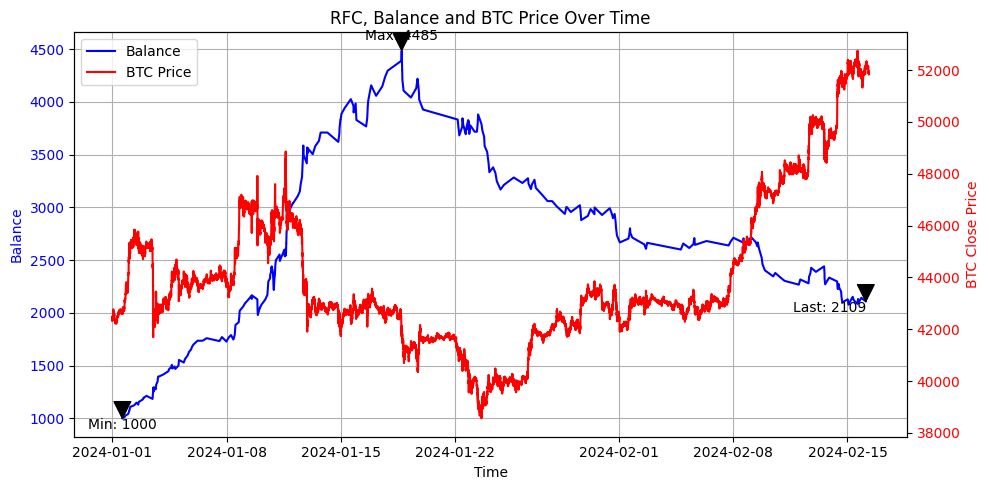

In [147]:
#predict

predictions = np.load(f'Data/RFC_60_2024_prediction.npy')
matrix_array = np.load('Data/data_2024_matrix_60.npy')
balance, trades = BackTest(matrix_array, predictions)

trades_df = pd.DataFrame(trades, columns=['time', 'balance', 'trade_status', 'side', 'entryPrice', 'TakeProfit', 'StopLoss'])

# Load and process trades data
# trades_df = pd.read_csv(f'Data/Backtest/Trades/trades_{filename}.csv')
trades_df['time'] = trades_df['time'].apply(lambda x: unix_to_iso(x))
trades_df['time'] = pd.to_datetime(trades_df['time'])

# Load and process BTC data
btc_df = pd.read_csv('Data/2024_BTCUSDT_3min_data.csv')
btc_df = btc_df[['Open time', 'Close']]
btc_df['time'] = btc_df['Open time'].apply(lambda x: unix_to_iso(x))
btc_df['time'] = pd.to_datetime(btc_df['time'])
btc_df.drop(columns=['Open time'], inplace=True)

# Find the maximum and last balance values
max_balance = trades_df['balance'].max()
min_balance = trades_df['balance'].min()
last_balance = trades_df['balance'].iloc[-1]

time_of_max_balance = trades_df[trades_df['balance'] == max_balance]['time'].iloc[0]
time_of_min_balance = trades_df[trades_df['balance'] == min_balance]['time'].iloc[0]
last_time = trades_df['time'].iloc[-1]

max_balance = round(max_balance)
min_balance = round(min_balance)
last_balance = round(last_balance)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot balance on the primary y-axis
ax1.plot(trades_df['time'], trades_df['balance'], linestyle='-', color='blue', label='Balance')
# ax1.set_ylim(500, 1500)
ax1.set_xlabel('Time')
ax1.set_ylabel('Balance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis for BTC close price
ax2 = ax1.twinx()
ax2.plot(btc_df['time'], btc_df['Close'], linestyle='-', color='red', label='BTC Price')
ax2.set_ylabel('BTC Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate the maximum balance
ax1.annotate(f'Max: {max_balance}', 
                xy=(time_of_max_balance, max_balance), 
                xytext=(time_of_max_balance, max_balance + 100),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')  # Horizontal alignment

# Annotate the minimum balance
ax1.annotate(f'Min: {min_balance}', 
                xy=(time_of_min_balance, min_balance), 
                xytext=(time_of_min_balance, min_balance - 100),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')  # Horizontal alignment

# Annotate the last balance
ax1.annotate(f'Last: {last_balance}', 
                xy=(last_time, last_balance), 
                xytext=(last_time, last_balance - 100),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='right')  # Horizontal alignment

# Set the title and layout
plt.title(f'RFC, Balance and BTC Price Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
fig.tight_layout()  # Adjust layout

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Save the figure
# fig.savefig(f'Figures/RFC.png')
plt.show()
plt.close(fig)


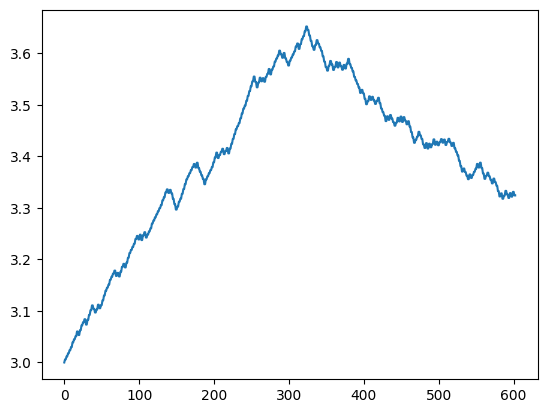

In [148]:

import math
temp = trades_df['balance'].apply(lambda x: math.log10(x))

plt.plot(temp)